Importing libraries

In [0]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

import your google driver here and authorized it with authorization code

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Download and extract dataset, current link is from google drive which can b changed with any other link
and if you are working on local notebook then simply skip this

In [0]:
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.99):
            print('\nReached 90% accuracy so cancelling training.')
            self.model.stop_training = True

callbacks = myCallBack()

In [0]:
#enter exact location of dataset here from your drive or whatever you dataset location is

src = "/content/drive/My Drive/AI/dataset.zip"
dst = "/tmp/dataset.zip"
copyfile(src, dst)

local_zip = '/tmp/dataset.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

just confirming that the we've extact dataset properly
this step can be skiped

In [0]:
print(len(os.listdir('/tmp/dataset/training/')))
print(len(os.listdir('/tmp/dataset/testing/')))

2
2


In [0]:
TRAINING_DIR = "/tmp/dataset/training/"
TRAINING_GENUINE_DIR = "/tmp/dataset/training/genuine/"
TRAINING_FORGED_DIR = "/tmp/dataset/training/forged/"

TESTING_DIR = "/tmp/dataset/testing/"
TESTING_GENUINE_DIR = "/tmp/dataset/testing/genuine/"
TESTING_FORGED_DIR = "/tmp/dataset/testing/forged/"

In [0]:
print(len(os.listdir(TRAINING_GENUINE_DIR)))
print(len(os.listdir(TRAINING_FORGED_DIR)))
print(len(os.listdir(TESTING_GENUINE_DIR)))
print(len(os.listdir(TESTING_FORGED_DIR)))

2056
3675
501
1500


Now we create a model because we are using images and we want sequential model for that 
adding different convolutional neural layers
we are using 2 Dimantional Convolutional layers and RELU as activation function and currently our data is no linear so we will change all images into 150x150 resolution in RGB image format
after every Convolution layer we add a pooling layer which get the maximum value from previous layer in 2x2 matrix
after that we will add a flatten layers
now we will define the density of neurons in neural network which in our case is 512
and in the end we will add an output layers of 1 neuron with sigmoid as activation function

and compile the model with binary_crossentropy as loss function because our output will be either 0 or 1 (binary)

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 256)      

In [0]:
TRAINING_DIR = "/tmp/dataset/training/"
# Experiment with your own parameters here to really try to drive it to 99.9% accuracy or better
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/tmp/dataset/testing/"
# Experiment with your own parameters here to really try to drive it to 99.9% accuracy or better
validation_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 5730 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
# Note that this may take some time.
history = model.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks=[callbacks])

Epoch 1/10
58/58 [==============================] - 86s 1s/step - loss: 0.8447 - acc: 0.6267 - val_loss: 0.6179 - val_acc: 0.7500
Epoch 2/10
58/58 [==============================] - 75s 1s/step - loss: 0.6630 - acc: 0.6400 - val_loss: 0.6087 - val_acc: 0.7500
Epoch 3/10
58/58 [==============================] - 77s 1s/step - loss: 0.6554 - acc: 0.6415 - val_loss: 0.5859 - val_acc: 0.7500
Epoch 4/10
58/58 [==============================] - 78s 1s/step - loss: 0.6426 - acc: 0.6401 - val_loss: 0.5530 - val_acc: 0.7605
Epoch 5/10
58/58 [==============================] - 76s 1s/step - loss: 0.6396 - acc: 0.6419 - val_loss: 0.5376 - val_acc: 0.7590
Epoch 6/10
58/58 [==============================] - 73s 1s/step - loss: 0.6331 - acc: 0.6487 - val_loss: 0.5185 - val_acc: 0.7610
Epoch 7/10
58/58 [==============================] - 70s 1s/step - loss: 0.6332 - acc: 0.6518 - val_loss: 0.5196 - val_acc: 0.7600
Epoch 8/10
58/58 [==============================] - 71s 1s/step - loss: 0.6291 - acc: 0.65

just visualizing our data this step can be skipped if you dont need it

<Figure size 432x288 with 0 Axes>

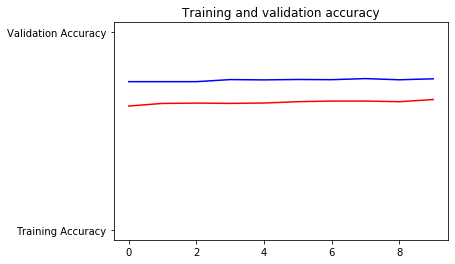

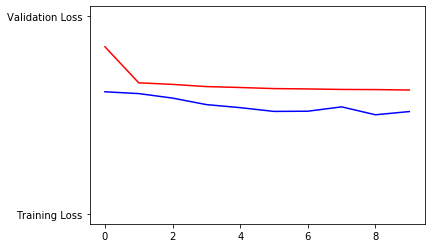

<Figure size 432x288 with 0 Axes>

In [0]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)